# New Section

In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)

2.1.0a0
11.8


In [2]:
import numpy as np
np.random.seed(0)
import os, glob
import time
import h5py
import pyarrow as pa
import pyarrow.parquet as pq
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import ConcatDataset, Dataset, DataLoader, sampler, DistributedSampler
#from torch.utils.data import *
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import torch
#from torch_geometric.data import Data
class ParquetDataset(Dataset):
    def __init__(self, filename):
        self.parquet = pq.ParquetFile(filename)
        self.cols = None # read all columns
        #self.cols = ['X_jets.list.item.list.item.list.item','y'] 
    def __getitem__(self, index):
        data = self.parquet.read_row_group(index, columns=self.cols).to_pydict()
        data['X_jet'] = torch.tensor(np.float32(data['X_jet'])) 
        #data['y'] = torch.tensor(np.float32(data['y']))
        #data['jetPt'] = torch.tensor(np.float32(data['jetPt'])) 
        #data['m0'] = torch.tensor(np.float32(data['m0']))
        #data['pt'] = torch.tensor(np.float32(data['pt']))
        # Preprocessing
        #data['nonzeroPixels'][data['nonzeroPixels'] < 1.e-3] = 0. # Zero-Suppression
        #data['nonzeroPixels'][-1,...] = 25.*data['nonzeroPixels'][-1,...] # For HCAL: to match pixel intensity distn of other layers
        #data['nonzeroPixels'] = data['nonzeroPixels']/100. # To standardize
        return dict(data)
    def __len__(self):
        return self.parquet.num_row_groups

In [4]:
!ls -ltr /eos/home-i02/r/rchudasa/SWAN_projects/e2e/MLAnalyzer/plottingMacros/top_gun_opendata_0.parquet

-rw-r--r--. 1 rchudasa 1399 1171158319 Mar 20 20:58 /eos/home-i02/r/rchudasa/SWAN_projects/e2e/MLAnalyzer/plottingMacros/top_gun_opendata_0.parquet


In [5]:
#decays = ['DYToTauTau_M-50_13TeV','QCD_Pt-15to7000_TuneCP5_Flat_13TeV','TTToHadronic_TuneCP5_13TeV_powheg','WJetsToLNu_TuneCP5_13TeV_madgraphMLM']

def prepareDataset(decay):
    file_list = []
    numEvents = 0
    #for roots,dirs,files in os.walk('/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/{}'.format(decay)):
    '''
    for roots,dirs,files in os.walk('/pscratch/sd/r/rchudasa/TauClassification/DataPreparation/'):

        for name in files:
            file = os.path.join(roots,name)
            print(file)
            print(file, len(ParquetDataset(file)))
            numEvents += len(ParquetDataset(file))
            if (numEvents > 22000):
                break
            file_list.append(file)
    print(numEvents) '''
    file = '/eos/home-i02/r/rchudasa/SWAN_projects/e2e/MLAnalyzer/plottingMacros/top_gun_opendata_0.parquet'
    print("length is:", len(ParquetDataset(file)))
    dset_train = ParquetDataset(file)
    #dset_train = ConcatDataset([ParquetDataset(f) for f in file_list])
    #train_sampler = sampler.SubsetRandomSampler(idxs[:len(dset_train)])
    #train_loader = DataLoader(dataset=dset_train, batch_size=4)
    train_loader = DataLoader(dataset=dset_train, batch_size=1)
 
    return train_loader

    '''decays = glob.glob('/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.1',
                      '/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.10',
                      '/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.11',
                      '/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.12',
                      '/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.13',
                      '/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.14',
                      '/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.15',
                      '/eos/home-i02/r/rchudasa/e2e_project/ParquetFiles/TTToHadronic_TuneCP5_13TeV_powheg-pythia8/TTToHadronic_TuneCP5_13TeV_powheg-pythia8.parquet.16')
    #decays_train = decays[0:2]
    #decays_valid = decays[2:4]
    #print(">> Train files: ",decays_train, "\n>> Valid files: ", decays_valid)
    print(decays)

    idxs = np.random.permutation(10000)
    #train_loader = DataLoader(dataset=dset_train, batch_size=BATCH_SZ, num_workers=0, sampler=train_sampler, pin_memory=True)
'''
    

In [6]:
prepareDataset('topGun')

length is: 150327


In [8]:
# Avg Shower
all_avg_showers = []
def prepareAverageShower(decay,dir_name,file_name):
    max0 = 0
    size0 = 0

    sum_shower_pT = torch.tensor(np.zeros((1,125,125)))
    sum_shower_d0 = torch.tensor(np.zeros((1,125,125)))
    sum_shower_z0 = torch.tensor(np.zeros((1,125,125)))
    sum_shower_ECAL = torch.tensor(np.zeros((1,125,125)))
    sum_shower_HCAL = torch.tensor(np.zeros((1,125,125)))
    sum_shower_BPIX1 = torch.tensor(np.zeros((1,125,125)))
    sum_shower_BPIX2 = torch.tensor(np.zeros((1,125,125)))
    sum_shower_BPIX3 = torch.tensor(np.zeros((1,125,125)))
    sum_shower_BPIX4 = torch.tensor(np.zeros((1,125,125)))
    #sum_shower_TIB1 = torch.tensor(np.zeros((1,125,125)))
    #sum_shower_TIB2 = torch.tensor(np.zeros((1,125,125)))
    #sum_shower_TOB1 = torch.tensor(np.zeros((1,125,125)))
    #sum_shower_TOB2 = torch.tensor(np.zeros((1,125,125)))
    sns.set_theme()


    for i,data in enumerate(prepareDataset(decay)):
        if i>=500:
            break
        data_0 = data["X_jet"][0]
        X_jets_0 = data_0
        #print(i, data["X_jet"].shape, X_jets_0.shape)
        if i%100==0:
            print(i)
        size0 = size0 + X_jets_0.shape[0]
        #if size0!=0:
        #    print("size0:",size0)

        if size0!=0:
            sum_shower_pT = sum_shower_pT + torch.sum(X_jets_0[:,0,:,:], dim=0, keepdim=True)
            sum_shower_d0 = sum_shower_d0 + torch.sum(torch.abs(X_jets_0[:,1,:,:]), dim=0, keepdim=True)
            sum_shower_z0 = sum_shower_z0 + torch.sum(torch.abs(X_jets_0[:,2,:,:]), dim=0, keepdim=True)            
            sum_shower_ECAL = sum_shower_ECAL + torch.sum(X_jets_0[:,3,:,:], dim=0, keepdim=True)           
            sum_shower_HCAL = sum_shower_HCAL + torch.sum(X_jets_0[:,4,:,:], dim=0, keepdim=True)           
            sum_shower_BPIX1 = sum_shower_BPIX1 + torch.sum(X_jets_0[:,5,:,:], dim=0, keepdim=True)            
            sum_shower_BPIX2 = sum_shower_BPIX2 + torch.sum(X_jets_0[:,6,:,:], dim=0, keepdim=True)            
            sum_shower_BPIX3 = sum_shower_BPIX3 + torch.sum(X_jets_0[:,7,:,:], dim=0, keepdim=True)            
            #sum_shower_BPIX4 = sum_shower_BPIX4 + torch.sum(X_jets_0[:,8,:,:], dim=0, keepdim=True)            
            #sum_shower_TIB1 = sum_shower_TIB1 + torch.sum(X_jets_0[:,9,:,:], dim=0, keepdim=True)            
            #sum_shower_TIB2 = sum_shower_TIB2 + torch.sum(X_jets_0[:,10,:,:], dim=0, keepdim=True)            
            #sum_shower_TOB1 = sum_shower_TOB1 + torch.sum(X_jets_0[:,11,:,:], dim=0, keepdim=True)            
            #sum_shower_TOB2 = sum_shower_TOB2 + torch.sum(X_jets_0[:,12,:,:], dim=0, keepdim=True)           
    

    avg_shower_pT = sum_shower_pT/size0
    avg_shower_d0 = sum_shower_d0/size0
    avg_shower_z0 = sum_shower_z0/size0
    avg_shower_ECAL = sum_shower_ECAL/size0
    avg_shower_HCAL = sum_shower_HCAL/size0
    avg_shower_BPIX1 = sum_shower_BPIX1/size0
    avg_shower_BPIX2 = sum_shower_BPIX2/size0
    avg_shower_BPIX3 = sum_shower_BPIX3/size0   
    #avg_shower_BPIX4 = sum_shower_BPIX4/size0  
    #avg_shower_TIB1 = sum_shower_TIB1/size0
    #avg_shower_TIB2 = sum_shower_TIB2/size0
    #avg_shower_TOB1 = sum_shower_TOB1/size0
    #avg_shower_TOB2 = sum_shower_TOB2/size0
    
      #mask_shower = torch.tensor(np.zeros_like(avg_shower,dtype=np.bool))
      #mask_shower[0][avg_shower[0]==0] = True

      #if i==3:
      #  break
    print('max0:',max0,'size0:',size0)#, 'shower_0_max:',avg_shower_pT.max(),'shower_1_max:',avg_shower_1_pT.max())
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    torch.save(avg_shower_pT,'{}/{}_avg_shower_pT.pt'.format(dir_name, file_name))
    torch.save(avg_shower_d0,'{}/{}_avg_shower_d0.pt'.format(dir_name, file_name))
    torch.save(avg_shower_z0,'{}/{}_avg_shower_z0.pt'.format(dir_name, file_name))
    torch.save(avg_shower_ECAL,'{}/{}_avg_shower_ECAL.pt'.format(dir_name, file_name))
    torch.save(avg_shower_HCAL,'{}/{}_avg_shower_HCAL.pt'.format(dir_name, file_name))
    torch.save(avg_shower_BPIX1,'{}/{}_avg_shower_BPIX1.pt'.format(dir_name, file_name))
    torch.save(avg_shower_BPIX2,'{}/{}_avg_shower_BPIX2.pt'.format(dir_name, file_name))
    torch.save(avg_shower_BPIX3,'{}/{}_avg_shower_BPIX3.pt'.format(dir_name, file_name))
    #torch.save(avg_shower_BPIX4,'{}/{}_avg_shower_BPIX4.pt'.format(dir_name, file_name))
    #torch.save(avg_shower_TIB1,'{}/{}_avg_shower_TIB1.pt'.format(dir_name, file_name))
    #torch.save(avg_shower_TIB2,'{}/{}_avg_shower_TIB2.pt'.format(dir_name, file_name))
    #torch.save(avg_shower_TOB1,'{}/{}_avg_shower_TOB1.pt'.format(dir_name, file_name))
    #torch.save(avg_shower_TOB2,'{}/{}_avg_shower_TOB2.pt'.format(dir_name, file_name))
    
    all_avg_showers.append(avg_shower_pT)
    all_avg_showers.append(avg_shower_d0)
    all_avg_showers.append(avg_shower_z0)
    all_avg_showers.append(avg_shower_ECAL)
    all_avg_showers.append(avg_shower_HCAL)
    all_avg_showers.append(avg_shower_BPIX1)
    all_avg_showers.append(avg_shower_BPIX2)
    all_avg_showers.append(avg_shower_BPIX3)
    #all_avg_showers.append(avg_shower_BPIX4)
    #all_avg_showers.append(avg_shower_TIB1)
    #all_avg_showers.append(avg_shower_TIB2)
    #all_avg_showers.append(avg_shower_TOB1)
    #all_avg_showers.append(avg_shower_TOB2)

In [9]:
#prepareAverageShower('TTToHadronic_TuneCP5_13TeV_powheg','average_shower_plots/TTToHadronic_Tau','TTToHadronic_Tau')
#prepareAverageShower('DYToTauTau_M-50_13TeV','average_shower_plots_checks/DYToTauTau','DYToTauTau')
#prepareAverageShower('DYToEE_M-50_13TeV-powheg_pythia8','average_shower_plots/DYToEE_ele','DYToEleEle')
#prepareAverageShower('QCD_Pt-30to50_EMEnriched_TuneCP5_13TeV_pythia8','average_shower_plots/QCDEmEnriched','QCDEmEnriched')
#prepareAverageShower('DYToEE_M-50_13TeV-powheg_pythia8','average_shower_plots_checks/DYToEE_ele','DYToEleEle')
prepareAverageShower('Top_gun','average_shower_plots_checks/Top_gun','topGun')



length is: 150327
0
100
200
300
400
max0: 0 size0: 500


In [10]:
len(all_avg_showers)

8

In [14]:
#maximum value of average showers
channels = ['pT','dz','z0','ECAL','HCAL','BPIX1','BPIX2','BPIX3']#,'BPIX4','TIB1','TIB2','TOB1','TOB2']

#all_avg_showers = [avg_shower_0_pT, avg_shower_0_d0, avg_shower_0_z0, avg_shower_0_ECAL, avg_shower_0_HCAL,
#                   avg_shower_0_BPIX1, avg_shower_0_BPIX2, avg_shower_0_BPIX3, avg_shower_0_BPIX4,
#avg_shower_0_TIB1, avg_shower_0_TIB2, avg_shower_0_TOB1, avg_shower_0_TOB2]
maxVal = []
minVal = []
#print(torch.max(avg_shower_0_pT))
for i in range(len(all_avg_showers)):
    maxVal.append(torch.max(all_avg_showers[i]))
    minVal.append(torch.min(all_avg_showers[i]))
    print(torch.max(all_avg_showers[i]), torch.min(all_avg_showers[i]))
    #print (max(avg_shower_0_))

print(maxVal)
#maxVal[0].item()

tensor(7.1338, dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(3.3337, dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(1.2671, dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(5.6253, dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(4.7968, dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(0.1520, dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(0.1780, dtype=torch.float64) tensor(0., dtype=torch.float64)
tensor(0.1980, dtype=torch.float64) tensor(0., dtype=torch.float64)
[tensor(7.1338, dtype=torch.float64), tensor(3.3337, dtype=torch.float64), tensor(1.2671, dtype=torch.float64), tensor(5.6253, dtype=torch.float64), tensor(4.7968, dtype=torch.float64), tensor(0.1520, dtype=torch.float64), tensor(0.1780, dtype=torch.float64), tensor(0.1980, dtype=torch.float64)]


In [15]:
def preparePlots(avgShower,minV,maxV,channel,dir_name,file_name):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    plt.subplots(figsize=(20,15))
    plt.title(channel, size=25)
    plt.rcParams['ytick.left'] = True
    #X AXIS

    '''ax = plt.axes()
    plt.xlim([0., 125.+0.])

    ax_range_x = np.arange(0,125+25,25)
    ax.set_xticks(ax_range_x)
    ax.set_xticklabels(ax_range_x)
    
    ax.xaxis.set_tick_params(direction='in', which='major', length=6.)
    ax.xaxis.set_tick_params(direction='in', which='minor', length=3.)

    #Y AXIS
    plt.ylim([125.+0.,0.])
    plt.yticks(np.arange(150,0,25))
    
    ax_range_y = np.arange(0,125+25,25)
    ax.set_yticks(ax_range_y)
    ax.set_yticklabels(ax_range_y)
    ax.yaxis.set_tick_params(direction='in', which='major', length=6.)
    ax.yaxis.set_tick_params(direction='in', which='minor', length=3.)'''

    #ax = sns.heatmap(all_avg_showers[i][0], cmap="CMRmap", vmin=minVal[i], vmax=maxVal[i])#, mask=mask_shower[0])#,linecolor="blue",linewidths=0.05)
    ax = sns.heatmap(avgShower, cmap="CMRmap", vmin=minV, vmax=maxV)#, mask=mask_shower[0])#,linecolor="blue",linewidths=0.05)

    ax.set_xlabel(r"$\mathrm{i\varphi}'$", size=28) #28, 30
    ax.set_xlim(0,125)
    ax.set_xticks(np.arange(0,150,25))
    ax.set_xticklabels(np.arange(0,150,25),rotation=0,size=20)
    #ax.xaxis.set_tick_params(direction='in', which='major', length=6., rotation=70)
    #ax.xaxis.set_tick_params(direction='in', which='minor', length=3.)
   
    ax.set_ylabel(r"$\mathrm{i\eta}'$", size=28) #28, 30
    ax.set_ylim(125,0)
    ax.set_yticks(np.arange(0,150,25))
    ax.set_yticklabels(np.arange(0,150,25),size=20)

    #plt.xticks(np.arange(0,150,25))
    #hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.savefig('{}/{}_{}.png'.format(dir_name,file_name,channel))
    print(channels[i])
    plt.show()

pT


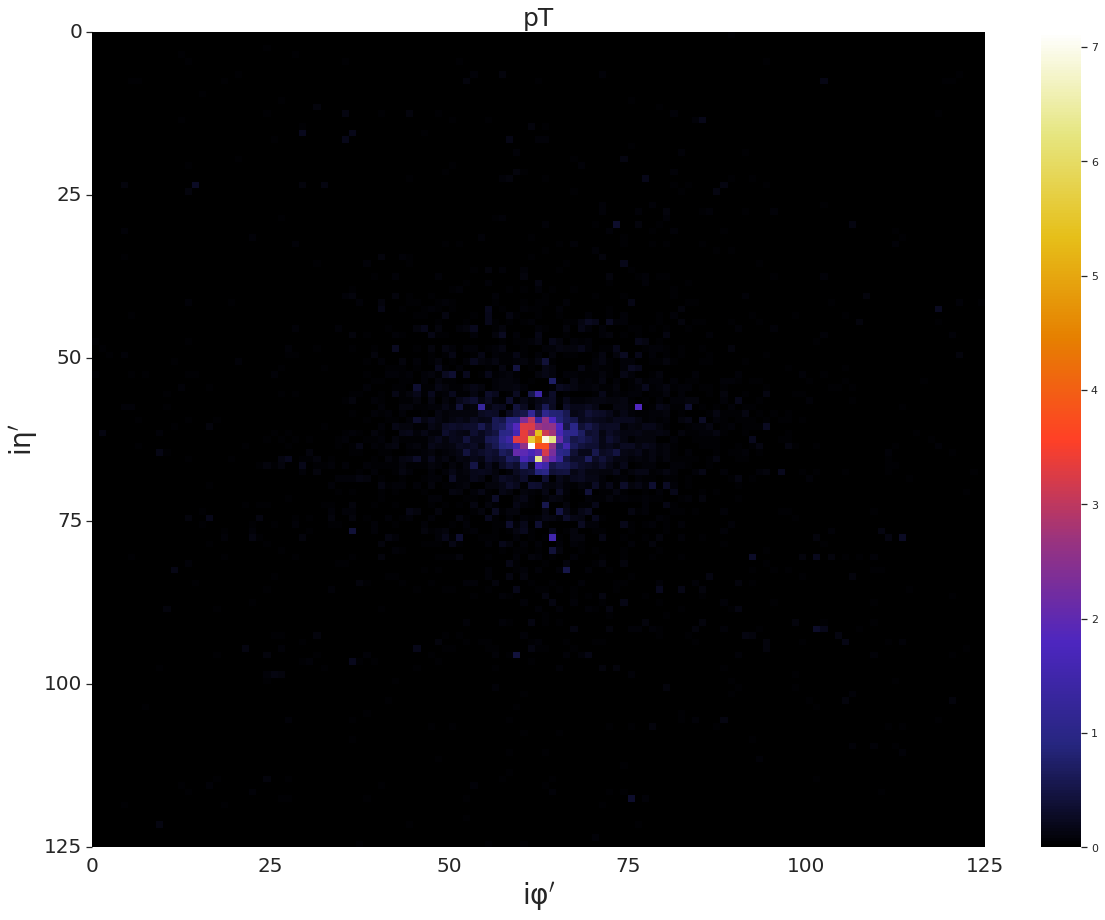

dz


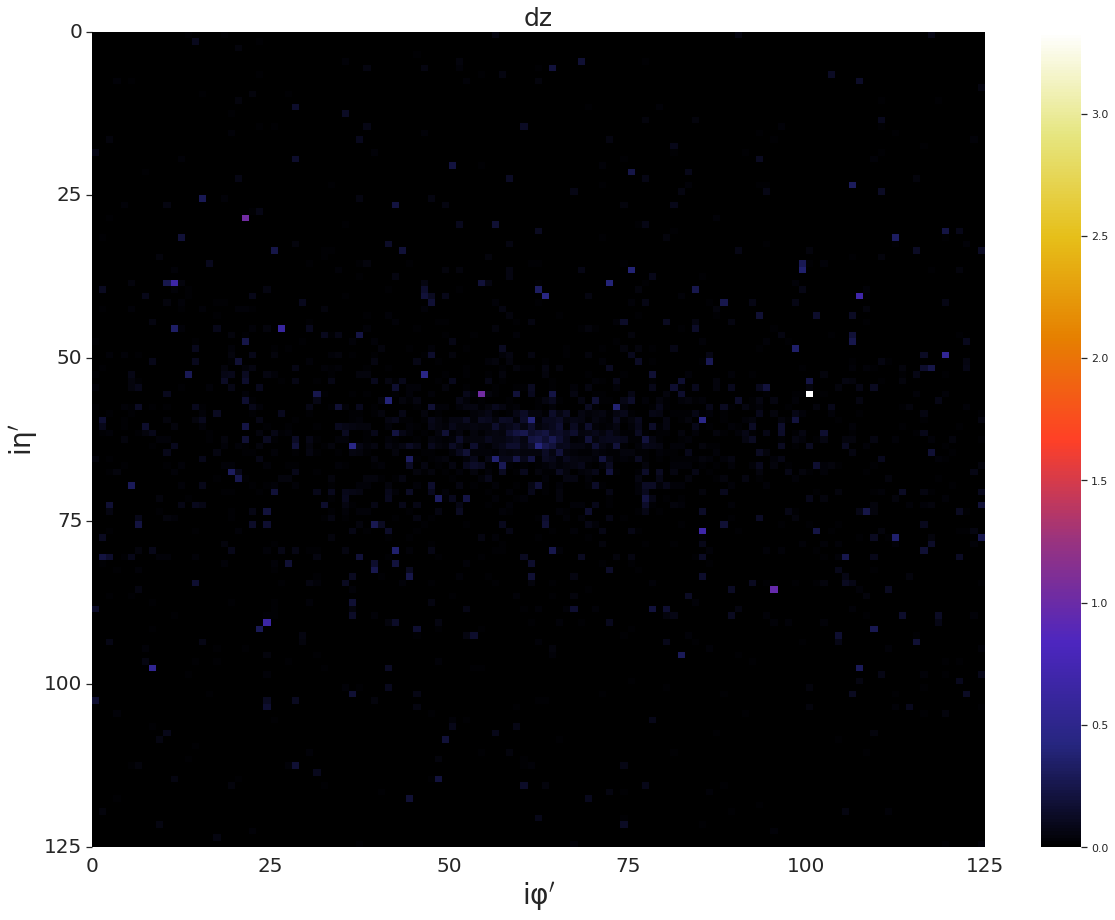

z0


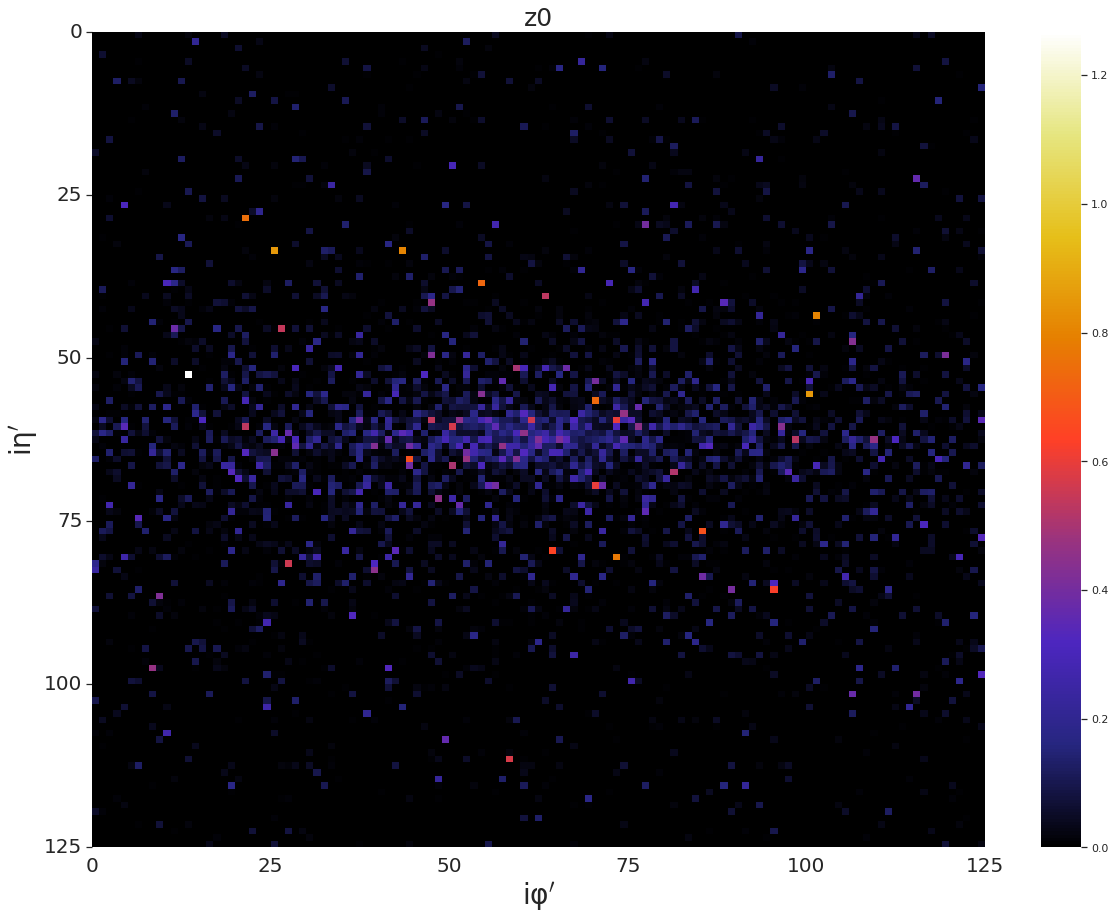

ECAL


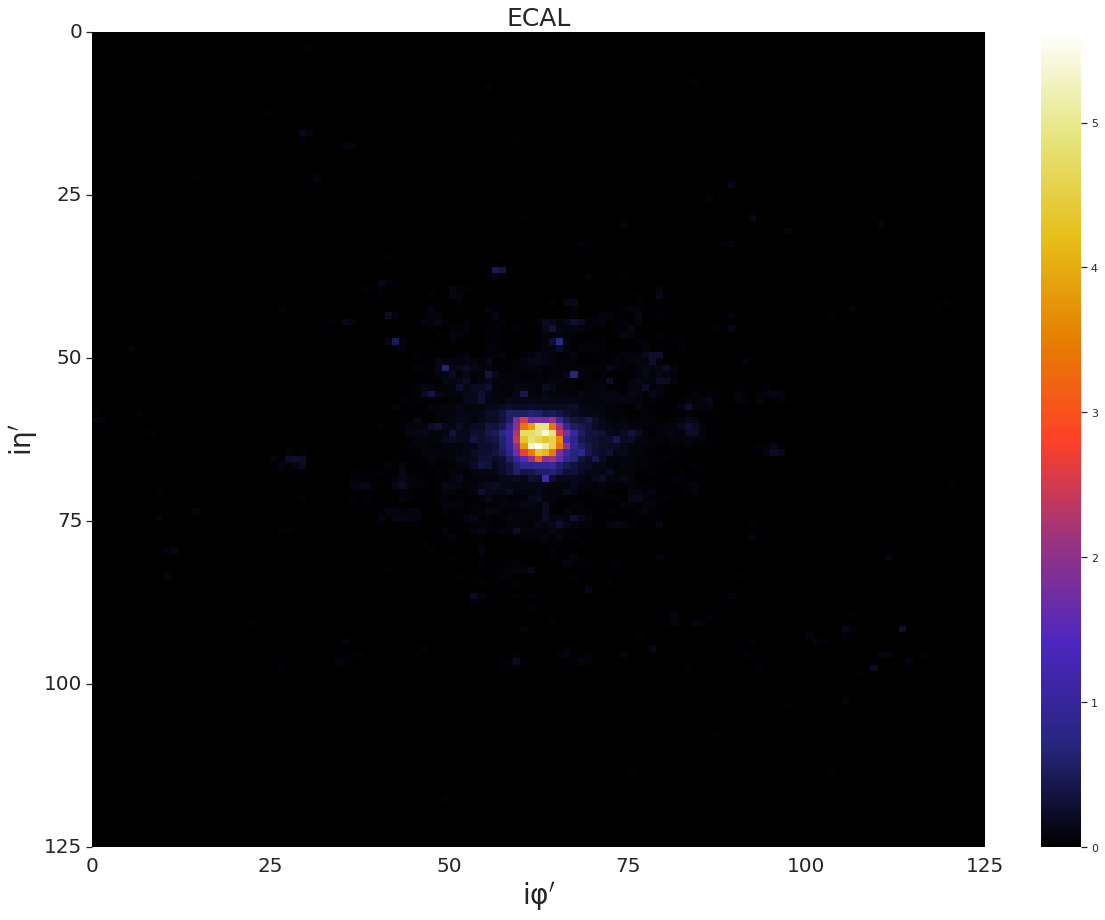

HCAL


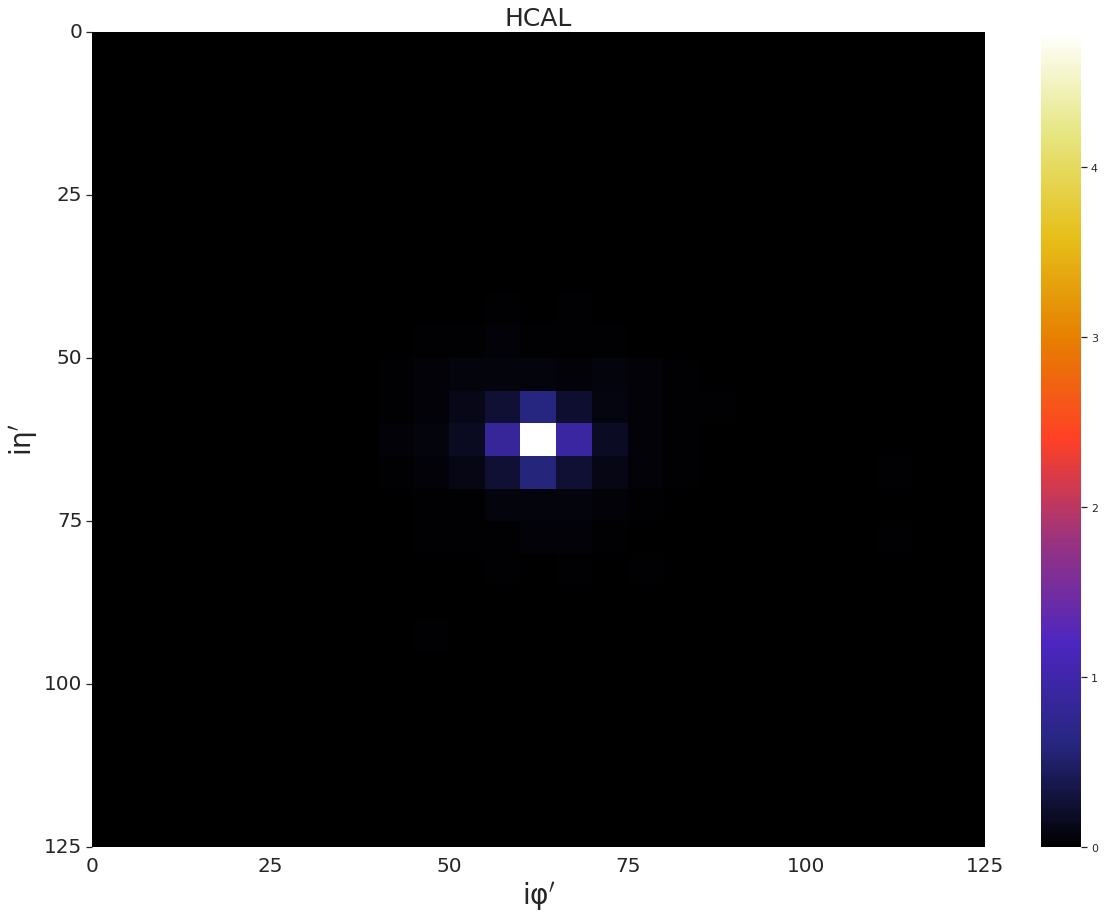

BPIX1


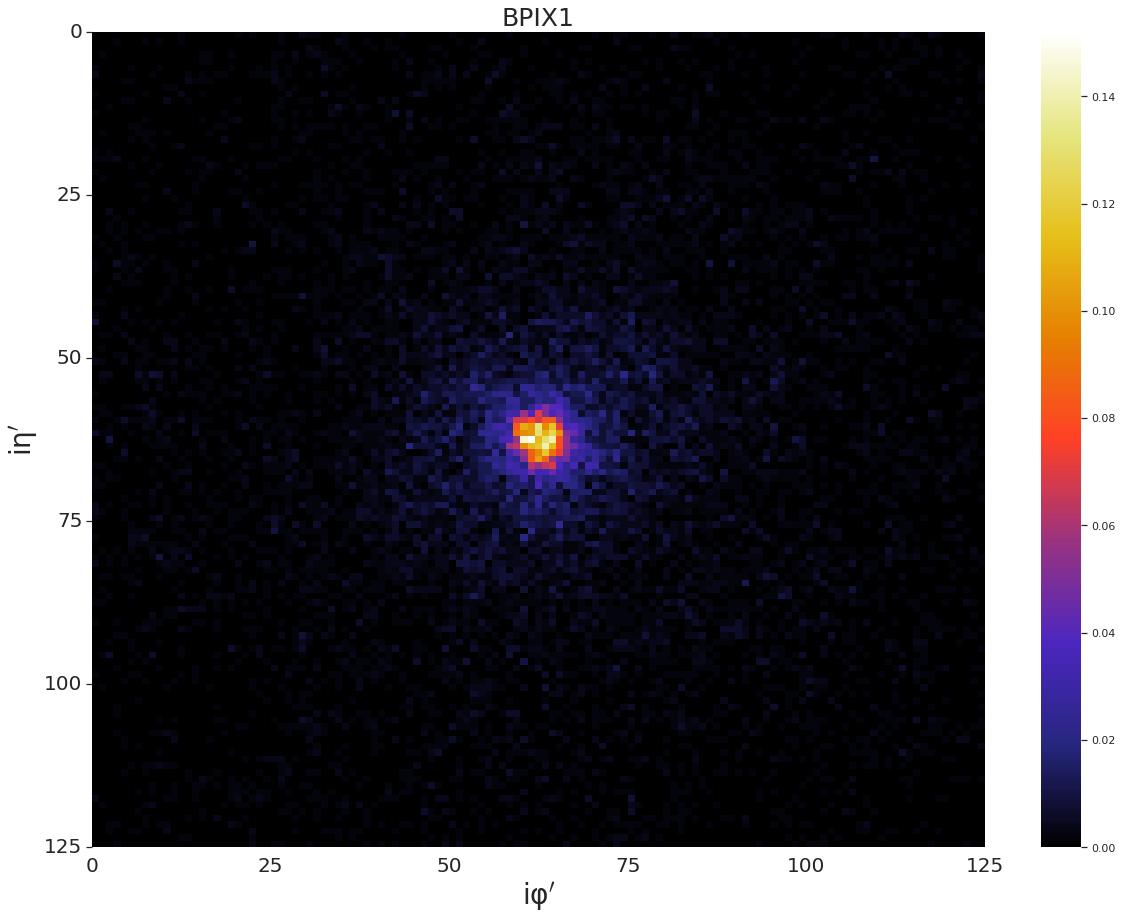

BPIX2


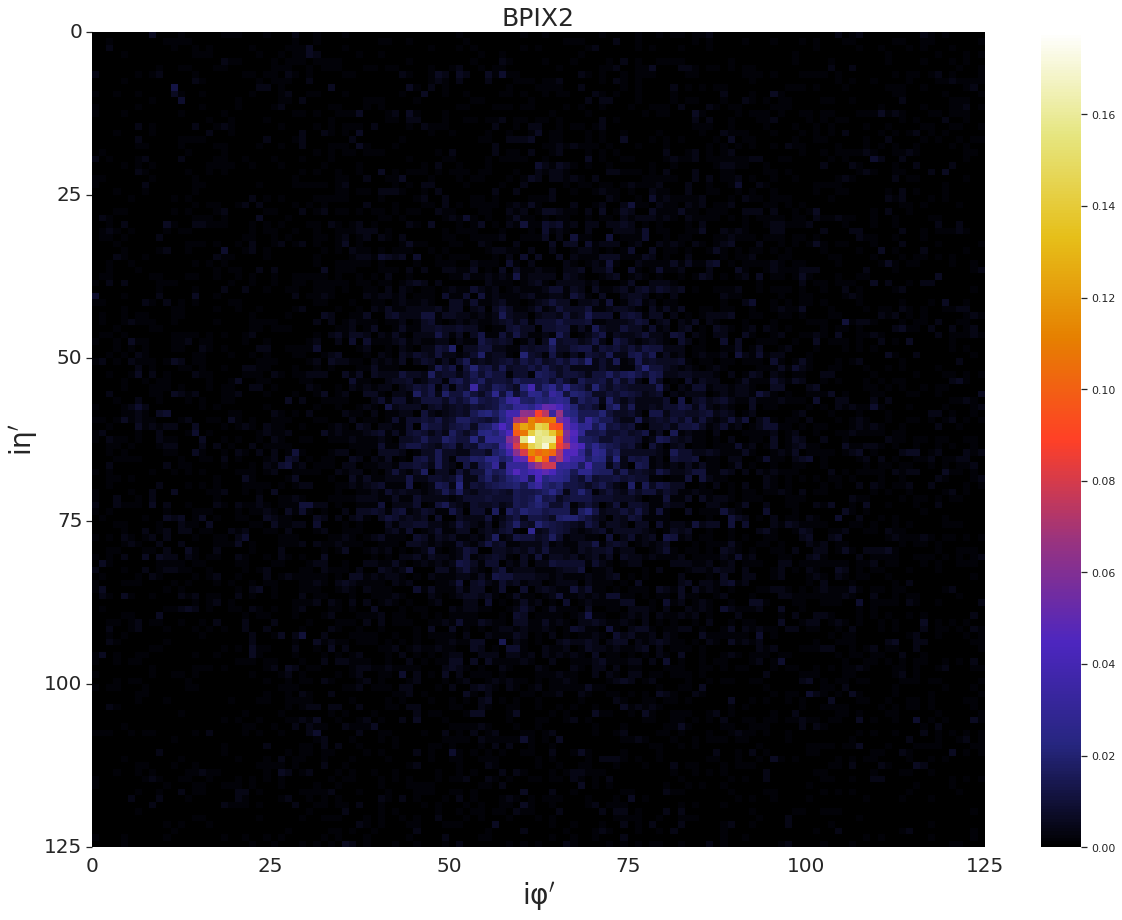

BPIX3


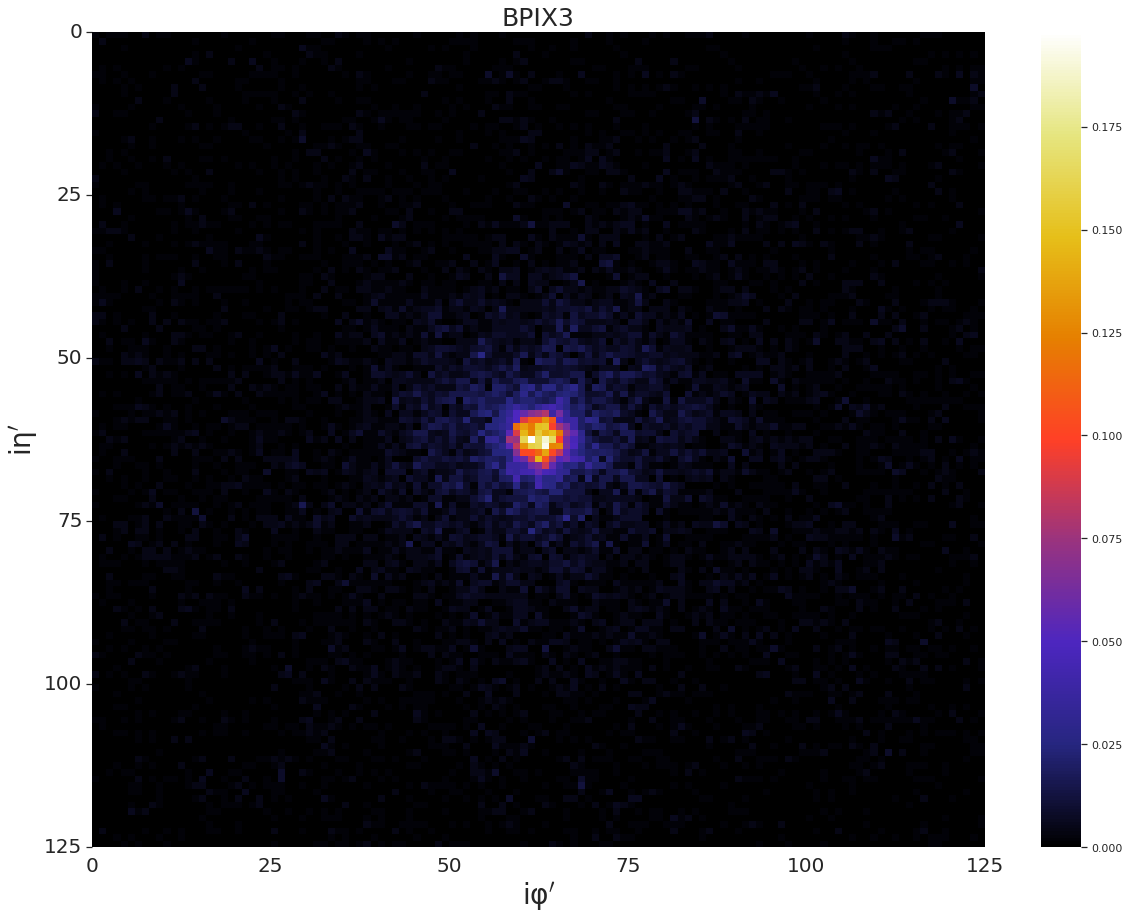

In [16]:
for i in range(len(all_avg_showers)):
    #if i>=1:
    #   break
    #preparePlots(all_avg_showers[i][0],minVal[i],maxVal[i],channels[i],'average_shower_plots_checks/DYToTauTau_plots','DYToTauTau_M-50_13TeV')
    #preparePlots(all_avg_showers[i][0],minVal[i],maxVal[i],channels[i],'average_shower_plots/QCDEmEnriched_plots','QCDEmEnriched')
    preparePlots(all_avg_showers[i][0],minVal[i],maxVal[i],channels[i], 'average_shower_plots_checks/TopGun','TopGun')
